<>:26: SyntaxWarning: invalid escape sequence '\('
<>:26: SyntaxWarning: invalid escape sequence '\('
/tmp/ipython-input-111281734.py:26: SyntaxWarning: invalid escape sequence '\('
  mask = ~df.columns.str.contains("src|\(\d+\)|Unnamed|placeholder|image|carousel|link", regex=True, case=False)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 19.4 MB/s eta 0:00:00
Amazon dataset shape: (47, 7)
Noon dataset shape: (43, 9)

Amazon columns: ['Rank', 'Product_Link', 'Image_Link', 'Product_Name', 'Rating', 'Reviews', 'Price']

Noon columns: ['Product_Link', 'Image_Link', 'BestSellerTag_rank__worjv', 'Product_Name', 'Rating', 'Reviews', 'Price', 'Old_Price', 'Price_Discount']

After cleaning - Amazon shape: (47, 5), Noon shape: (43, 7)
Amazon columns: ['Rank', 'Product_Name', 'Rating', 'Reviews', 'Price']
Noon columns: ['BestSellerTag_rank__worjv', 'Product_Name', 'Rating', 'Reviews', 'Price', 'Old_Price', 'Price_Discount']

Amazon cleaned: 47 products
Noon cleaned: 43 products

Amazon sample products:
  1. PQRQP 3 in 1 Wireless Microphone for iPhone, Android, Camera, USB-C Microphone, ...
  2. Boyamini Wireless Lavalier Microphone for iPhone/iPad Mfi Certified Lightning Pl...
  3. BONAOK Wireless Bluetooth Karaoke Microphone, 3-in-1 Portable Handheld Mic Speak...

Noon sampl

,Amazon_Product,Noon_Product,Match_Score,Amazon_Price,Noon_Price,Price_Diff_Amazon_Minus_Noon,Price_Diff_EGP,Best_Option
0,"MAONO USB Microphone, 192KHZ/24Bit Plug & Play...","Maono AU-A04 USB Microphone, MAONO Plug & Play...",100.000000,2299.00,2299.00,0.00,Same Price,Noon
1,Hollyland Lark M1 Wireless Lavalier Microphone...,Hollyland Hollyland Wireless Microphone Lark M...,93.069307,1749.00,4245.00,-2496.00,Noon +2496 EGP,Amazon
2,Well 2 in 1 K8 Wireless Microphone...,Mick K8 2-in-1 Wireless Digital Microphone - C...,92.063492,190.00,179.95,10.05,Amazon +10 EGP,Noon
3,ADHOMAX K8 Wireless Microphone 2.4G Omnidirect...,BOYA BY-M1 Pro Omnidirectional Lavalier Microp...,82.352941,111.98,500.00,-388.02,Noon +388 EGP,Amazon
4,Razer Seiren V3 Mini - Ultra-compact USB Micro...,BOYA Supercardioid Condenser Mic BY-MM1+...,81.818182,2499.00,400.00,2099.00,Amazon +2099 EGP,Noon
5,RUBEHOOW Condenser Microphone Bundle With BM-8...,V8 Streamer Microphone Live Sound Card...,81.250000,999.00,499.00,500.00,Amazon +500 EGP,Noon
6,"ALPOWL Podcast Equipment Bundle, Audio Interfa...",V8 Streamer Microphone Live Sound Card...,81.250000,1050.00,499.00,551.00,Amazon +551 EGP,Noon
7,"PQRQP 3 in 1 Wireless Microphone for iPhone, A...",3 in 1 Wireless Lavalier Microphone for iPhone...,77.922078,599.00,999.00,-400.00,Noon +400 EGP,Amazon
8,Boyamini Wireless Lavalier Microphone for iPho...,BOYA Mini-15 Wireless Microphone for iPhone wi...,75.075075,1183.45,3000.00,-1816.55,Noon +1817 EGP,Amazon
9,Delieu Wireless Lavalier Microphone (for USB C...,MOURIV CM207 Lavalier Microphone Clip-on Lapel...,73.737374,128.00,150.00,-22.00,Noon +22 EGP,Amazon


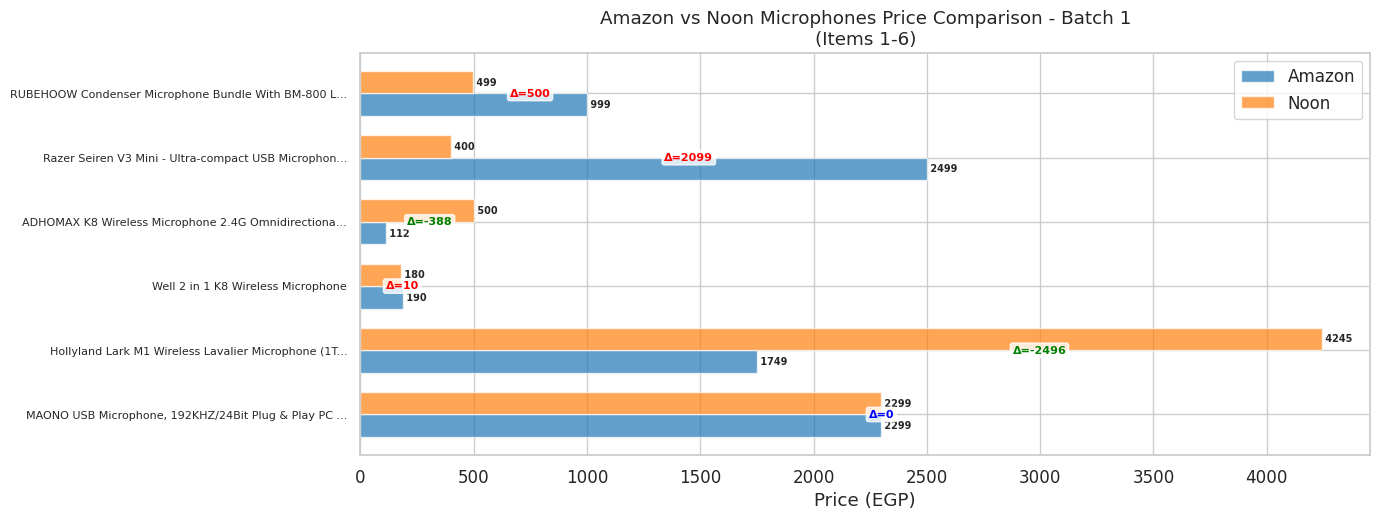

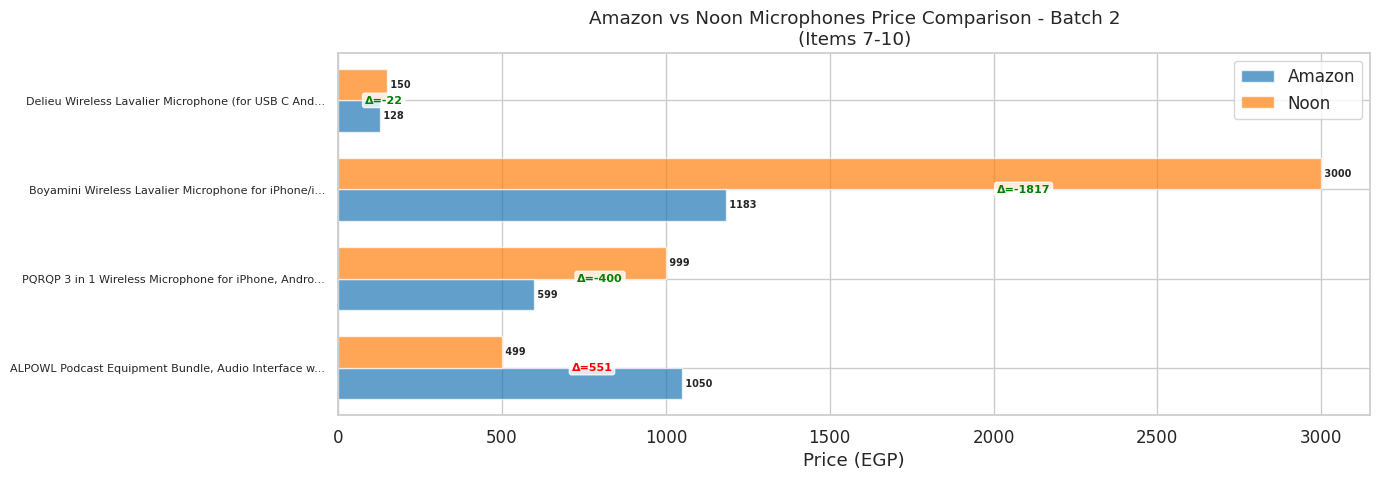


=== 📈 Microphones Comparison Statistics ===
Total matches: 10
Average match score: 83.9%
📦 Amazon cheaper in: 5 microphones
🛒 Noon cheaper in: 5 microphones
⚖️ Same price in: 1 microphones
💰 Average price difference: -196.25 EGP (Amazon - Noon)
💸 Maximum saving on Amazon: 2496 EGP
💸 Maximum saving on Noon: 2099 EGP

🏆 Best Microphone Deals:
🔥 Best Amazon deal: Hollyland Lark M1 Wireless Lavalier Microphone (1TX+1RX, No ...
   Amazon: 1749 EGP, Noon: 4245 EGP, Save: 2496 EGP
🔥 Best Noon deal: Razer Seiren V3 Mini - Ultra-compact USB Microphone (14 mm C...
   Amazon: 2499 EGP, Noon: 400 EGP, Save: 2099 EGP

💾 Saved files:
- Amazon_vs_Noon_Microphones_comparison.csv
- Amazon_vs_Noon_Microphones_comparison.xlsx


In [1]:
!pip install rapidfuzz --quiet

import pandas as pd, numpy as np, re
from rapidfuzz import process, fuzz
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid", font_scale=1.1)

# تعريف الفايلات
AMAZON_FILE = "amazon_microphones.csv"
NOON_FILE = "noon_microphones.csv"
MATCH_THRESHOLD = 70  # نخفض الثreshold عشان نشوف كل التشابهات
BATCH_SIZE = 6

# قراءة البيانات
amazon = pd.read_csv(AMAZON_FILE)
noon = pd.read_csv(NOON_FILE)

print(f"Amazon dataset shape: {amazon.shape}")
print(f"Noon dataset shape: {noon.shape}")
print("\nAmazon columns:", amazon.columns.tolist())
print("\nNoon columns:", noon.columns.tolist())

def drop_junk_cols(df):
    """حذف الأعمدة غير المهمة"""
    mask = ~df.columns.str.contains("src|\(\d+\)|Unnamed|placeholder|image|carousel|link", regex=True, case=False)
    return df.loc[:, mask]

def find_column_like(df, patterns):
    """الباحث عن الأعمدة بناء على أنماط"""
    cols = df.columns.tolist()
    for p in patterns:
        for c in cols:
            if p.lower() in c.lower():
                return c
    text_cols = [c for c in cols if df[c].dtype == object]
    if text_cols:
        return text_cols[0]
    return None

def clean_numeric_series(s):
    """تنظيف البيانات الرقمية"""
    if s is None or len(s) == 0:
        return pd.Series([np.nan] * len(s))
    s = s.astype(str).str.replace(",", "", regex=False).str.strip()
    s = s.str.replace("EGP", "", regex=False).str.strip()
    s = s.str.replace("out of 5 stars", "", regex=False).str.strip()
    extracted = s.str.extract(r"([0-9]+(?:\.[0-9]+)?)")[0]
    return pd.to_numeric(extracted, errors="coerce")

def normalize_product_name(s):
    """توحيد تنسيق أسماء المنتجات"""
    s = str(s).lower()
    s = re.sub(r"package(ing)? may vary", " ", s)
    s = re.sub(r"\b(\d+\s*(ml|g|gm|kg|l|oz|cm|mm|mah|w|wh))\b", " ", s)
    s = re.sub(r"\b(ml|g|gm|kg|l|oz|pack|packs|pcs|piece|pieces|box|set|mah|w|wh)\b", " ", s)
    s = re.sub(r"[^a-z0-9\s]", " ", s)
    s = re.sub(r"\s+", " ", s).strip()
    return s

# تنظيف البيانات
amazon = drop_junk_cols(amazon)
noon = drop_junk_cols(noon)

print(f"\nAfter cleaning - Amazon shape: {amazon.shape}, Noon shape: {noon.shape}")

# تحديد الأعمدة بناء على الهيكل المعروف للفايلات
a_product_col = "Product_Name"
a_price_col = "Price"
a_rating_col = "Rating"
a_reviews_col = "Reviews"

n_product_col = "Product_Name"
n_price_col = "Price"
n_old_col = "Old_Price"
n_rating_col = "Rating"
n_reviews_col = "Reviews"

print("Amazon columns:", amazon.columns.tolist())
print("Noon columns:", noon.columns.tolist())

# تنظيف بيانات Amazon
amazon_clean = pd.DataFrame()
amazon_clean['Product_raw'] = amazon[a_product_col] if a_product_col in amazon.columns else amazon.iloc[:, 0]
amazon_clean['Price_raw'] = amazon[a_price_col] if a_price_col in amazon.columns else amazon.iloc[:, 6]
amazon_clean['Rating_raw'] = amazon[a_rating_col] if a_rating_col in amazon.columns else amazon.iloc[:, 4]
amazon_clean['Reviews_raw'] = amazon[a_reviews_col] if a_reviews_col in amazon.columns else amazon.iloc[:, 5]

# تنظيف بيانات Noon
noon_clean = pd.DataFrame()
noon_clean['Product_raw'] = noon[n_product_col] if n_product_col in noon.columns else noon.iloc[:, 3]
noon_clean['Price_raw'] = noon[n_price_col] if n_price_col in noon.columns else noon.iloc[:, 6]
noon_clean['OldPrice_raw'] = noon[n_old_col] if n_old_col in noon.columns else (noon.iloc[:, 7] if len(noon.columns) > 7 else None)
noon_clean['Rating_raw'] = noon[n_rating_col] if n_rating_col in noon.columns else noon.iloc[:, 4]
noon_clean['Reviews_raw'] = noon[n_reviews_col] if n_reviews_col in noon.columns else noon.iloc[:, 5]

# تطبيع أسماء المنتجات
amazon_clean['Product_norm'] = amazon_clean['Product_raw'].fillna("").map(normalize_product_name)
noon_clean['Product_norm'] = noon_clean['Product_raw'].fillna("").map(normalize_product_name)

# تنظيف البيانات الرقمية
amazon_clean['Price'] = clean_numeric_series(amazon_clean['Price_raw'])
amazon_clean['Rating'] = clean_numeric_series(amazon_clean['Rating_raw'])
amazon_clean['Reviews'] = clean_numeric_series(amazon_clean['Reviews_raw'])

noon_clean['Price'] = clean_numeric_series(noon_clean['Price_raw'])
noon_clean['Old_Price'] = clean_numeric_series(noon_clean['OldPrice_raw']) if noon_clean['OldPrice_raw'] is not None else pd.Series([np.nan] * len(noon_clean))
noon_clean['Rating'] = clean_numeric_series(noon_clean['Rating_raw'])
noon_clean['Reviews'] = clean_numeric_series(noon_clean['Reviews_raw'])

print(f"\nAmazon cleaned: {len(amazon_clean)} products")
print(f"Noon cleaned: {len(noon_clean)} products")

# عرض عينات من البيانات
print("\nAmazon sample products:")
for i in range(min(3, len(amazon_clean))):
    print(f"  {i+1}. {amazon_clean.iloc[i]['Product_raw'][:80]}...")

print("\nNoon sample products:")
for i in range(min(3, len(noon_clean))):
    print(f"  {i+1}. {noon_clean.iloc[i]['Product_raw'][:80]}...")

# عمل المطابقة بين المنتجات
noon_choices = noon_clean['Product_norm'].fillna("").tolist()
results = []

print(f"\n🔍 Matching products with threshold: {MATCH_THRESHOLD}%")

for idx, row in amazon_clean.iterrows():
    a_name = row['Product_norm']
    if not a_name.strip():
        continue

    match = process.extractOne(a_name, noon_choices, scorer=fuzz.token_set_ratio)
    if match is None:
        continue

    best_name, score, match_index = match
    if score < MATCH_THRESHOLD:
        continue

    n_row = noon_clean.iloc[match_index]
    a_price = row['Price'] if not pd.isna(row['Price']) else np.nan
    n_price = n_row['Price'] if not pd.isna(n_row['Price']) else np.nan

    # حساب فرق السعر (Amazon - Noon)
    price_diff = (a_price - n_price) if (not np.isnan(a_price) and not np.isnan(n_price)) else np.nan

    # تحديد الأفضل بناء على السعر
    if np.isnan(price_diff):
        if not np.isnan(a_price) and np.isnan(n_price):
            best_opt = "Amazon"
        elif np.isnan(a_price) and not np.isnan(n_price):
            best_opt = "Noon"
        else:
            best_opt = "Unknown"
    else:
        best_opt = "Amazon" if a_price < n_price else "Noon"

    results.append({
        "Amazon_idx": idx,
        "Noon_idx": match_index,
        "Amazon_Product": row['Product_raw'],
        "Amazon_Price": a_price,
        "Amazon_Rating": row['Rating'],
        "Amazon_Reviews": row['Reviews'],
        "Noon_Product": n_row['Product_raw'],
        "Noon_Price": n_price,
        "Noon_Old_Price": n_row['Old_Price'],
        "Noon_Rating": n_row['Rating'],
        "Noon_Reviews": n_row['Reviews'],
        "Match_Score": score,
        "Price_Diff_Amazon_Minus_Noon": price_diff,
        "Best_Option": best_opt
    })

# إنشاء DataFrame النهائي
comparison = pd.DataFrame(results).sort_values("Match_Score", ascending=False).reset_index(drop=True)

# إضافة عمود يوضح فرق السعر بشكل أوضح
comparison['Price_Diff_EGP'] = comparison['Price_Diff_Amazon_Minus_Noon'].apply(
    lambda x: f"Amazon +{abs(x):.0f} EGP" if x > 0 else f"Noon +{abs(x):.0f} EGP" if x < 0 else "Same Price" if x == 0 else "N/A"
)

# حفظ النتائج
comparison.to_csv("Amazon_vs_Noon_Microphones_comparison.csv", index=False)
comparison.to_excel("Amazon_vs_Noon_Microphones_comparison.xlsx", index=False)

print(f"\n✅ Done. Total matches found: {len(comparison)}")

if len(comparison) > 0:
    print(f"\n📊 All matched Microphones ({len(comparison)} products):")

    # عرض جدول مبسط
    display_df = comparison[[
        'Amazon_Product',
        'Noon_Product',
        'Match_Score',
        'Amazon_Price',
        'Noon_Price',
        'Price_Diff_Amazon_Minus_Noon',
        'Price_Diff_EGP',
        'Best_Option'
    ]].copy()

    # تقصير أسماء المنتجات للعرض
    display_df['Amazon_Product'] = display_df['Amazon_Product'].str.slice(0, 60) + "..."
    display_df['Noon_Product'] = display_df['Noon_Product'].str.slice(0, 60) + "..."

    display(display_df.head(20))  # عرض أول 20 منتج فقط

    # دالة لعرض الرسوم البيانية
    def plot_batches(df, batch_size=6):
        names = df["Amazon_Product"].astype(str).tolist()
        a_prices = df["Amazon_Price"].tolist()
        n_prices = df["Noon_Price"].tolist()
        price_diffs = df["Price_Diff_Amazon_Minus_Noon"].tolist()

        for i in range(0, len(names), batch_size):
            batch_names = names[i:i+batch_size]
            batch_a = a_prices[i:i+batch_size]
            batch_n = n_prices[i:i+batch_size]
            batch_diffs = price_diffs[i:i+batch_size]

            y = np.arange(len(batch_names))
            height = 0.35

            plt.figure(figsize=(14, max(5, len(batch_names)*0.9)))
            bars_a = plt.barh(y - height/2, batch_a, height=height, label="Amazon", color="#1f77b4", alpha=0.7)
            bars_n = plt.barh(y + height/2, batch_n, height=height, label="Noon", color="#ff7f0e", alpha=0.7)

            plt.yticks(y, [name[:50] + "..." if len(name) > 50 else name for name in batch_names], fontsize=8)
            plt.xlabel("Price (EGP)")
            plt.title(f"Amazon vs Noon Microphones Price Comparison - Batch {i//batch_size + 1}\n(Items {i+1}-{i+len(batch_names)})")

            # إضافة القيم على الأعمدة
            for yi, av, nv, diff in zip(y, batch_a, batch_n, batch_diffs):
                if not pd.isna(av):
                    plt.text(av, yi - height/2, f" {av:.0f}", va="center", fontsize=7, fontweight='bold')
                if not pd.isna(nv):
                    plt.text(nv, yi + height/2, f" {nv:.0f}", va="center", fontsize=7, fontweight='bold')

                # إضافة فرق السعر في المنتصف
                if not pd.isna(diff):
                    mid_x = min(av, nv) + abs(diff)/2
                    color = "green" if diff < 0 else "red" if diff > 0 else "blue"
                    diff_text = f"Δ={diff:.0f}"
                    plt.text(mid_x, yi, diff_text, va="center", ha="center",
                            fontsize=8, fontweight='bold', color=color,
                            bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.8))

            plt.legend()
            plt.tight_layout()
            plt.show()

    # عرض الرسوم البيانية
    plot_df = comparison.sort_values("Match_Score", ascending=False).reset_index(drop=True)
    plot_batches(plot_df, batch_size=BATCH_SIZE)

    # إحصائيات إضافية
    print("\n=== 📈 Microphones Comparison Statistics ===")
    print(f"Total matches: {len(comparison)}")
    print(f"Average match score: {comparison['Match_Score'].mean():.1f}%")

    amazon_cheaper = len(comparison[comparison['Best_Option'] == 'Amazon'])
    noon_cheaper = len(comparison[comparison['Best_Option'] == 'Noon'])
    same_price = len(comparison[(comparison['Price_Diff_Amazon_Minus_Noon'] == 0) & (~comparison['Price_Diff_Amazon_Minus_Noon'].isna())])

    print(f"📦 Amazon cheaper in: {amazon_cheaper} microphones")
    print(f"🛒 Noon cheaper in: {noon_cheaper} microphones")
    print(f"⚖️ Same price in: {same_price} microphones")

    if len(comparison) > 0:
        valid_diffs = comparison['Price_Diff_Amazon_Minus_Noon'].dropna()
        if len(valid_diffs) > 0:
            avg_price_diff = valid_diffs.mean()
            max_saving_amazon = valid_diffs.min()  # أكثر فرق إيجابي لصالح Amazon
            max_saving_noon = valid_diffs.max()    # أكثر فرق إيجابي لصالح Noon

            print(f"💰 Average price difference: {avg_price_diff:.2f} EGP (Amazon - Noon)")
            print(f"💸 Maximum saving on Amazon: {abs(max_saving_amazon):.0f} EGP")
            print(f"💸 Maximum saving on Noon: {abs(max_saving_noon):.0f} EGP")

            # أفضل الصفقات
            if len(valid_diffs) > 0:
                print(f"\n🏆 Best Microphone Deals:")
                best_amazon_deal = comparison[comparison['Price_Diff_Amazon_Minus_Noon'] == max_saving_amazon].iloc[0]
                best_noon_deal = comparison[comparison['Price_Diff_Amazon_Minus_Noon'] == max_saving_noon].iloc[0]

                print(f"🔥 Best Amazon deal: {best_amazon_deal['Amazon_Product'][:60]}...")
                print(f"   Amazon: {best_amazon_deal['Amazon_Price']:.0f} EGP, Noon: {best_amazon_deal['Noon_Price']:.0f} EGP, Save: {abs(max_saving_amazon):.0f} EGP")

                print(f"🔥 Best Noon deal: {best_noon_deal['Amazon_Product'][:60]}...")
                print(f"   Amazon: {best_noon_deal['Amazon_Price']:.0f} EGP, Noon: {best_noon_deal['Noon_Price']:.0f} EGP, Save: {abs(max_saving_noon):.0f} EGP")

else:
    print("❌ No matches found. Try lowering the MATCH_THRESHOLD value.")

print("\n💾 Saved files:")
print("- Amazon_vs_Noon_Microphones_comparison.csv")
print("- Amazon_vs_Noon_Microphones_comparison.xlsx")